# Kaggle Datset Download

In [1]:
!kaggle datasets download -d sudalairajkumar/covid19-in-india


  0%|          | 0.00/285k [00:00<?, ?B/s]
100%|##########| 285k/285k [00:00<00:00, 697kB/s]
100%|##########| 285k/285k [00:00<00:00, 696kB/s]


In [ ]:
from zipfile import ZipFile
zf = ZipFile(r"C:\Users\chanu\covid19-in-india.zip")
zf.extractall(r'C:\Users\chanu\covid1')
zf.close()

In [1]:
#importing require packages

from pathlib import Path

import requests
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
from sklearn.model_selection import train_test_split


In [3]:
#Using File-caching,downloading csv file

file_name = cache_file(
    "COVID-19-C",
    "https://prsindia.org/covid-19/cases/download",
)
    
df = pd.read_csv(file_name)

In [4]:
print(df.tail(100))

      S. No.        Date Region  Confirmed Cases  Active Cases  \
6349    6350  01/06/2020  World          6057853       5686687   
6350    6351  02/06/2020  World          6194533       5818213   
6351    6352  03/06/2020  World          6287771       5907830   
6352    6353  04/06/2020  World          6416828       6033961   
6353    6354  05/06/2020  World          6535354       6148199   
...      ...         ...    ...              ...           ...   
6444    6445  05/09/2020  World         26468031      25596865   
6445    6446  06/09/2020  World         26763217      25886601   
6446    6447  07/09/2020  World         27032617      26151153   
6447    6448  08/09/2020  World         27236916      26345885   
6448    6449  09/09/2020  World         27486960      26591977   

      Cured/Discharged     Death  
6349               NaN  371166.0  
6350               NaN  376320.0  
6351               NaN  379941.0  
6352               NaN  382867.0  
6353               NaN  387155.0

# DATA Cleaning/Wrangling

In [5]:
df.columns

Index(['S. No.', 'Date', 'Region', 'Confirmed Cases', 'Active Cases',
       'Cured/Discharged', 'Death'],
      dtype='object')

In [6]:
df[df['Date']=='19/08/2020']

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
160,161,19/08/2020,India,2767273,676514,2037870.0,52889.0
328,329,19/08/2020,Andaman and Nicobar Islands,2529,1078,1421.0,30.0
511,512,19/08/2020,Andhra Pradesh,306261,85130,218311.0,2820.0
672,673,19/08/2020,Arunachal Pradesh,2875,921,1949.0,5.0
834,835,19/08/2020,Assam,82201,23704,58294.0,203.0
1007,1008,19/08/2020,Bihar,109498,28692,80330.0,476.0
1183,1184,19/08/2020,Chandigarh,2305,1032,1243.0,30.0
1358,1359,19/08/2020,Chhattisgarh,16833,5828,10847.0,158.0
1483,1484,19/08/2020,Dadra and Nagar Haveli and Daman and Diu,1951,425,1524.0,2.0
1666,1667,19/08/2020,Delhi,154741,11068,139447.0,4226.0


#Merging Population Census file

In [7]:
df1=pd.read_csv(r'C:\Users\chanu\Downloads\covid\population_india_census2011.csv')

In [8]:
df1.columns

Index(['Sno', 'State / Union Territory', 'Population', 'Rural population',
       'Urban population', 'Area', 'Density', 'Gender Ratio'],
      dtype='object')

In [9]:
#Apply join on two dataframes into new dataframe

dfm=pd.merge(df, df1, how='inner', on=None, left_on='Region', right_on='State / Union Territory',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [10]:
dfm[dfm['Date']=='19/08/2020']

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
145,329,19/08/2020,Andaman and Nicobar Islands,2529,1078,1421.0,30.0,34,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
328,512,19/08/2020,Andhra Pradesh,306261,85130,218311.0,2820.0,10,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993
489,673,19/08/2020,Arunachal Pradesh,2875,921,1949.0,5.0,26,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938
651,835,19/08/2020,Assam,82201,23704,58294.0,203.0,15,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954
824,1008,19/08/2020,Bihar,109498,28692,80330.0,476.0,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
1000,1184,19/08/2020,Chandigarh,2305,1032,1243.0,30.0,32,Chandigarh,1055450,28991,1026459,114 km2 (44 sq mi),"9,252/km2 (23,960/sq mi)",818
1175,1359,19/08/2020,Chhattisgarh,16833,5828,10847.0,158.0,17,Chhattisgarh,25545198,19607961,5937237,"135,191 km2 (52,198 sq mi)",189/km2 (490/sq mi),991
1300,1484,19/08/2020,Dadra and Nagar Haveli and Daman and Diu,1951,425,1524.0,2.0,33,Dadra and Nagar Haveli and Daman and Diu,585764,243510,342254,603 km2 (233 sq mi),"970/km2 (2,500/sq mi)",711
1483,1667,19/08/2020,Delhi,154741,11068,139447.0,4226.0,29,Delhi,16787941,419042,16368899,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868
1652,1836,19/08/2020,Goa,12333,3861,8356.0,116.0,25,Goa,1458545,551731,906814,"3,702 km2 (1,429 sq mi)","394/km2 (1,020/sq mi)",973


In [11]:
#Dropiing Duplicate columns
dfm=dfm.drop(['Sno','S. No.','State / Union Territory'],axis=1)

In [12]:
dfm[dfm['Date']=='19/08/2020']

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Rural population,Urban population,Area,Density,Gender Ratio
145,19/08/2020,Andaman and Nicobar Islands,2529,1078,1421.0,30.0,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
328,19/08/2020,Andhra Pradesh,306261,85130,218311.0,2820.0,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993
489,19/08/2020,Arunachal Pradesh,2875,921,1949.0,5.0,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938
651,19/08/2020,Assam,82201,23704,58294.0,203.0,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954
824,19/08/2020,Bihar,109498,28692,80330.0,476.0,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
1000,19/08/2020,Chandigarh,2305,1032,1243.0,30.0,1055450,28991,1026459,114 km2 (44 sq mi),"9,252/km2 (23,960/sq mi)",818
1175,19/08/2020,Chhattisgarh,16833,5828,10847.0,158.0,25545198,19607961,5937237,"135,191 km2 (52,198 sq mi)",189/km2 (490/sq mi),991
1300,19/08/2020,Dadra and Nagar Haveli and Daman and Diu,1951,425,1524.0,2.0,585764,243510,342254,603 km2 (233 sq mi),"970/km2 (2,500/sq mi)",711
1483,19/08/2020,Delhi,154741,11068,139447.0,4226.0,16787941,419042,16368899,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868
1652,19/08/2020,Goa,12333,3861,8356.0,116.0,1458545,551731,906814,"3,702 km2 (1,429 sq mi)","394/km2 (1,020/sq mi)",973


In [13]:
dfm.dtypes

Date                 object
Region               object
Confirmed Cases       int64
Active Cases          int64
Cured/Discharged    float64
Death               float64
Population            int64
Rural population      int64
Urban population      int64
Area                 object
Density              object
Gender Ratio          int64
dtype: object

In [14]:
#String Manipulation in two columns by removing certain part in strings 

In [15]:
dfm['Density']=dfm['Density'].str.replace(r"\(.*\)","")
dfm['Density']=dfm['Density'].str.replace(',','')
dfm['Density']=dfm['Density'].str.replace('/km2','')

In [16]:
dfm['Area']=dfm['Area'].str.replace(r"\(.*\)","")
dfm['Area']=dfm['Area'].str.replace(',','')
dfm['Area']=dfm['Area'].str.replace('km2','')

In [17]:
dfm=dfm.rename(columns={"Area": "Area_in_km", "Density": "Density_in_sqkm"})

In [18]:
dfm[dfm['Date']=='19/08/2020'].head()

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Rural population,Urban population,Area_in_km,Density_in_sqkm,Gender Ratio
145,19/08/2020,Andaman and Nicobar Islands,2529,1078,1421.0,30.0,380581,237093,143488,8249,46,876
328,19/08/2020,Andhra Pradesh,306261,85130,218311.0,2820.0,49577103,34966693,14610410,162968,303,993
489,19/08/2020,Arunachal Pradesh,2875,921,1949.0,5.0,1383727,1066358,317369,83743,17,938
651,19/08/2020,Assam,82201,23704,58294.0,203.0,31205576,26807034,4398542,78438,397,954
824,19/08/2020,Bihar,109498,28692,80330.0,476.0,104099452,92341436,11758016,94163,1102,918


In [19]:
dfm.dtypes

Date                 object
Region               object
Confirmed Cases       int64
Active Cases          int64
Cured/Discharged    float64
Death               float64
Population            int64
Rural population      int64
Urban population      int64
Area_in_km           object
Density_in_sqkm      object
Gender Ratio          int64
dtype: object

In [20]:
#Converting Datatypes

In [21]:
dfm['Area_in_km']=dfm['Area_in_km'].astype('int64')
dfm['Cured/Discharged']=dfm['Cured/Discharged'].astype('int64')
dfm['Death']=dfm['Death'].astype('int64')

In [22]:
dfm['Density_in_sqkm']=dfm['Density_in_sqkm'].astype(float)

In [23]:
dfm['Date'] = pd.to_datetime(dfm['Date'],format='%d/%m/%Y')

In [24]:
dfm.dtypes

Date                datetime64[ns]
Region                      object
Confirmed Cases              int64
Active Cases                 int64
Cured/Discharged             int64
Death                        int64
Population                   int64
Rural population             int64
Urban population             int64
Area_in_km                   int64
Density_in_sqkm            float64
Gender Ratio                 int64
dtype: object

#Data Cleaning on Hospital File

In [25]:
dfq=pd.read_csv(r'C:\Users\chanu\Downloads\covid\HospitalBedsIndia.csv')

In [26]:
dfq

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,6,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,7,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,8,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,9,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,10,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


In [27]:
dfq=dfq.fillna(0)
dfq=dfq.drop('Sno',axis=1)

In [28]:
dfq.dtypes

State/UT                             object
NumPrimaryHealthCenters_HMIS         object
NumCommunityHealthCenters_HMIS        int64
NumSubDistrictHospitals_HMIS        float64
NumDistrictHospitals_HMIS             int64
TotalPublicHealthFacilities_HMIS      int64
NumPublicBeds_HMIS                    int64
NumRuralHospitals_NHP18               int64
NumRuralBeds_NHP18                    int64
NumUrbanHospitals_NHP18               int64
NumUrbanBeds_NHP18                    int64
dtype: object

In [29]:
#String Manipulation

In [30]:
dfq['NumPrimaryHealthCenters_HMIS']=dfq['NumPrimaryHealthCenters_HMIS'].str.replace(',','')

In [31]:
dfq['NumPrimaryHealthCenters_HMIS']=pd.to_numeric(dfq.NumPrimaryHealthCenters_HMIS)

In [32]:
dfq.dtypes

State/UT                             object
NumPrimaryHealthCenters_HMIS          int64
NumCommunityHealthCenters_HMIS        int64
NumSubDistrictHospitals_HMIS        float64
NumDistrictHospitals_HMIS             int64
TotalPublicHealthFacilities_HMIS      int64
NumPublicBeds_HMIS                    int64
NumRuralHospitals_NHP18               int64
NumRuralBeds_NHP18                    int64
NumUrbanHospitals_NHP18               int64
NumUrbanBeds_NHP18                    int64
dtype: object

In [33]:
#String Conversion

In [34]:
dfq['NumSubDistrictHospitals_HMIS']=dfq['NumSubDistrictHospitals_HMIS'].astype(int)

In [35]:
dfq

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,0,15,199,2320,208,2136,10,268
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936
5,Chandigarh,40,2,1,4,47,3756,0,0,4,778
6,Chhattisgarh,813,166,12,32,1023,14354,169,5070,45,4342
7,Dadra & Nagar Haveli,9,2,1,1,13,568,10,273,1,316
8,Daman & Diu,4,2,0,2,8,298,5,240,0,0
9,Delhi,534,25,9,47,615,20572,0,0,109,24383


In [36]:
#Taking Column Names into List

In [37]:
columnDF=dfq.columns.tolist()

In [38]:
print(columnDF)

['State/UT', 'NumPrimaryHealthCenters_HMIS', 'NumCommunityHealthCenters_HMIS', 'NumSubDistrictHospitals_HMIS', 'NumDistrictHospitals_HMIS', 'TotalPublicHealthFacilities_HMIS', 'NumPublicBeds_HMIS', 'NumRuralHospitals_NHP18', 'NumRuralBeds_NHP18', 'NumUrbanHospitals_NHP18', 'NumUrbanBeds_NHP18']


In [39]:
#Calculating Sum on Row Using List Slicing and Sum Function

In [40]:
dfq["Total_Beds"] = dfq[columnDF[1:]].sum(axis=1)

In [41]:
dfq

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Total_Beds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500,2419
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658,87527
2,Arunachal Pradesh,122,62,0,15,199,2320,208,2136,10,268,5340
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198,39923
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936,35140
5,Chandigarh,40,2,1,4,47,3756,0,0,4,778,4632
6,Chhattisgarh,813,166,12,32,1023,14354,169,5070,45,4342,26026
7,Dadra & Nagar Haveli,9,2,1,1,13,568,10,273,1,316,1194
8,Daman & Diu,4,2,0,2,8,298,5,240,0,0,559
9,Delhi,534,25,9,47,615,20572,0,0,109,24383,46294


In [42]:
#Making new dataframe with reqd columns(Total Sum of beds)

In [43]:
dfq=dfq[['State/UT','Total_Beds']]

In [44]:
dfq

,State/UT,Total_Beds
0,Andaman & Nicobar Islands,2419
1,Andhra Pradesh,87527
2,Arunachal Pradesh,5340
3,Assam,39923
4,Bihar,35140
5,Chandigarh,4632
6,Chhattisgarh,26026
7,Dadra & Nagar Haveli,1194
8,Daman & Diu,559
9,Delhi,46294


# Merging dataframes into new Dataframe

In [45]:
dfa=pd.merge(dfm, dfq, how='inner', on=None, left_on='Region', right_on='State/UT',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [46]:
dfa.head()

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Rural population,Urban population,Area_in_km,Density_in_sqkm,Gender Ratio,State/UT,Total_Beds
0,2020-03-12,Andhra Pradesh,1,1,0,0,49577103,34966693,14610410,162968,303.0,993,Andhra Pradesh,87527
1,2020-03-13,Andhra Pradesh,1,1,0,0,49577103,34966693,14610410,162968,303.0,993,Andhra Pradesh,87527
2,2020-03-14,Andhra Pradesh,1,1,0,0,49577103,34966693,14610410,162968,303.0,993,Andhra Pradesh,87527
3,2020-03-15,Andhra Pradesh,1,1,0,0,49577103,34966693,14610410,162968,303.0,993,Andhra Pradesh,87527
4,2020-03-16,Andhra Pradesh,1,1,0,0,49577103,34966693,14610410,162968,303.0,993,Andhra Pradesh,87527


In [47]:
dfa=dfa.drop('State/UT',axis=1)

In [48]:
dfa[dfa['Date']=='18/08/2020']

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Rural population,Urban population,Area_in_km,Density_in_sqkm,Gender Ratio,Total_Beds
159,2020-08-18,Andhra Pradesh,296609,84777,209100,2732,49577103,34966693,14610410,162968,303.0,993,87527
320,2020-08-18,Arunachal Pradesh,2741,843,1893,5,1383727,1066358,317369,83743,17.0,938,5340
482,2020-08-18,Assam,79667,22736,56734,197,31205576,26807034,4398542,78438,397.0,954,39923
655,2020-08-18,Bihar,106307,29387,76452,468,104099452,92341436,11758016,94163,1102.0,918,35140
831,2020-08-18,Chandigarh,2216,1003,1183,30,1055450,28991,1026459,114,9252.0,818,4632
1006,2020-08-18,Chhattisgarh,16025,5277,10598,150,25545198,19607961,5937237,135191,189.0,991,26026
1189,2020-08-18,Delhi,153367,10852,138301,4214,16787941,419042,16368899,1484,11297.0,868,46294
1358,2020-08-18,Goa,11994,3825,8058,111,1458545,551731,906814,3702,394.0,973,5801
1533,2020-08-18,Gujarat,79710,14315,62595,2800,60439692,34694609,25745083,196024,308.0,919,78367
1716,2020-08-18,Haryana,48040,6880,40610,550,25351462,16509359,8842103,44212,573.0,879,27115


In [49]:
#Final DATASET

Removing rural and urban population columns

In [50]:
dfa.columns

Index(['Date', 'Region', 'Confirmed Cases', 'Active Cases', 'Cured/Discharged',
       'Death', 'Population', 'Rural population', 'Urban population',
       'Area_in_km', 'Density_in_sqkm', 'Gender Ratio', 'Total_Beds'],
      dtype='object')

In [51]:
dfa=dfa.drop(['Rural population', 'Urban population'],axis=1)

In [52]:
dfa.head()

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Area_in_km,Density_in_sqkm,Gender Ratio,Total_Beds
0,2020-03-12,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527
1,2020-03-13,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527
2,2020-03-14,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527
3,2020-03-15,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527
4,2020-03-16,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527


In [53]:
dfa['Density_in_sqkm'].describe()

count     5155.000000
mean      1164.693889
std       2562.643791
min         17.000000
25%        189.000000
50%        350.000000
75%        828.000000
max      11297.000000
Name: Density_in_sqkm, dtype: float64

In [54]:
dfa['DensityBin']=pd.cut(dfa['Density_in_sqkm'],bins=[0,500,1000,12000],labels=["Low","Mid","High"])

In [55]:
dfa[dfa['Date']=='18/08/2020']

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Area_in_km,Density_in_sqkm,Gender Ratio,Total_Beds,DensityBin
159,2020-08-18,Andhra Pradesh,296609,84777,209100,2732,49577103,162968,303.0,993,87527,Low
320,2020-08-18,Arunachal Pradesh,2741,843,1893,5,1383727,83743,17.0,938,5340,Low
482,2020-08-18,Assam,79667,22736,56734,197,31205576,78438,397.0,954,39923,Low
655,2020-08-18,Bihar,106307,29387,76452,468,104099452,94163,1102.0,918,35140,High
831,2020-08-18,Chandigarh,2216,1003,1183,30,1055450,114,9252.0,818,4632,High
1006,2020-08-18,Chhattisgarh,16025,5277,10598,150,25545198,135191,189.0,991,26026,Low
1189,2020-08-18,Delhi,153367,10852,138301,4214,16787941,1484,11297.0,868,46294,High
1358,2020-08-18,Goa,11994,3825,8058,111,1458545,3702,394.0,973,5801,Low
1533,2020-08-18,Gujarat,79710,14315,62595,2800,60439692,196024,308.0,919,78367,Low
1716,2020-08-18,Haryana,48040,6880,40610,550,25351462,44212,573.0,879,27115,Mid


# EDA - Exploratory Data Analysis

In [56]:
#Doing Correaltion between columns

In [57]:
dfa.corr()

,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Area_in_km,Density_in_sqkm,Gender Ratio,Total_Beds
Confirmed Cases,1.000000,0.940837,0.991825,0.916582,0.298850,0.287929,0.018523,-0.021965,0.383107
Active Cases,0.940837,1.000000,0.890161,0.906356,0.337641,0.346519,-0.030096,-0.005533,0.415568
Cured/Discharged,0.991825,0.890161,1.000000,0.887372,0.275626,0.256618,0.034669,-0.024972,0.360378
Death,0.916582,0.906356,0.887372,1.000000,0.285755,0.310518,0.039466,-0.081937,0.343946
Population,0.298850,0.337641,0.275626,0.285755,1.000000,0.713270,-0.150551,-0.127741,0.805361
Area_in_km,0.287929,0.346519,0.256618,0.310518,0.713270,1.000000,-0.306241,-0.059316,0.680537
Density_in_sqkm,0.018523,-0.030096,0.034669,0.039466,-0.150551,-0.306241,1.000000,-0.495638,-0.111022
Gender Ratio,-0.021965,-0.005533,-0.024972,-0.081937,-0.127741,-0.059316,-0.495638,1.000000,0.085987
Total_Beds,0.383107,0.415568,0.360378,0.343946,0.805361,0.680537,-0.111022,0.085987,1.000000


In [58]:
#For Visual Correlation - Using Pairplot

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

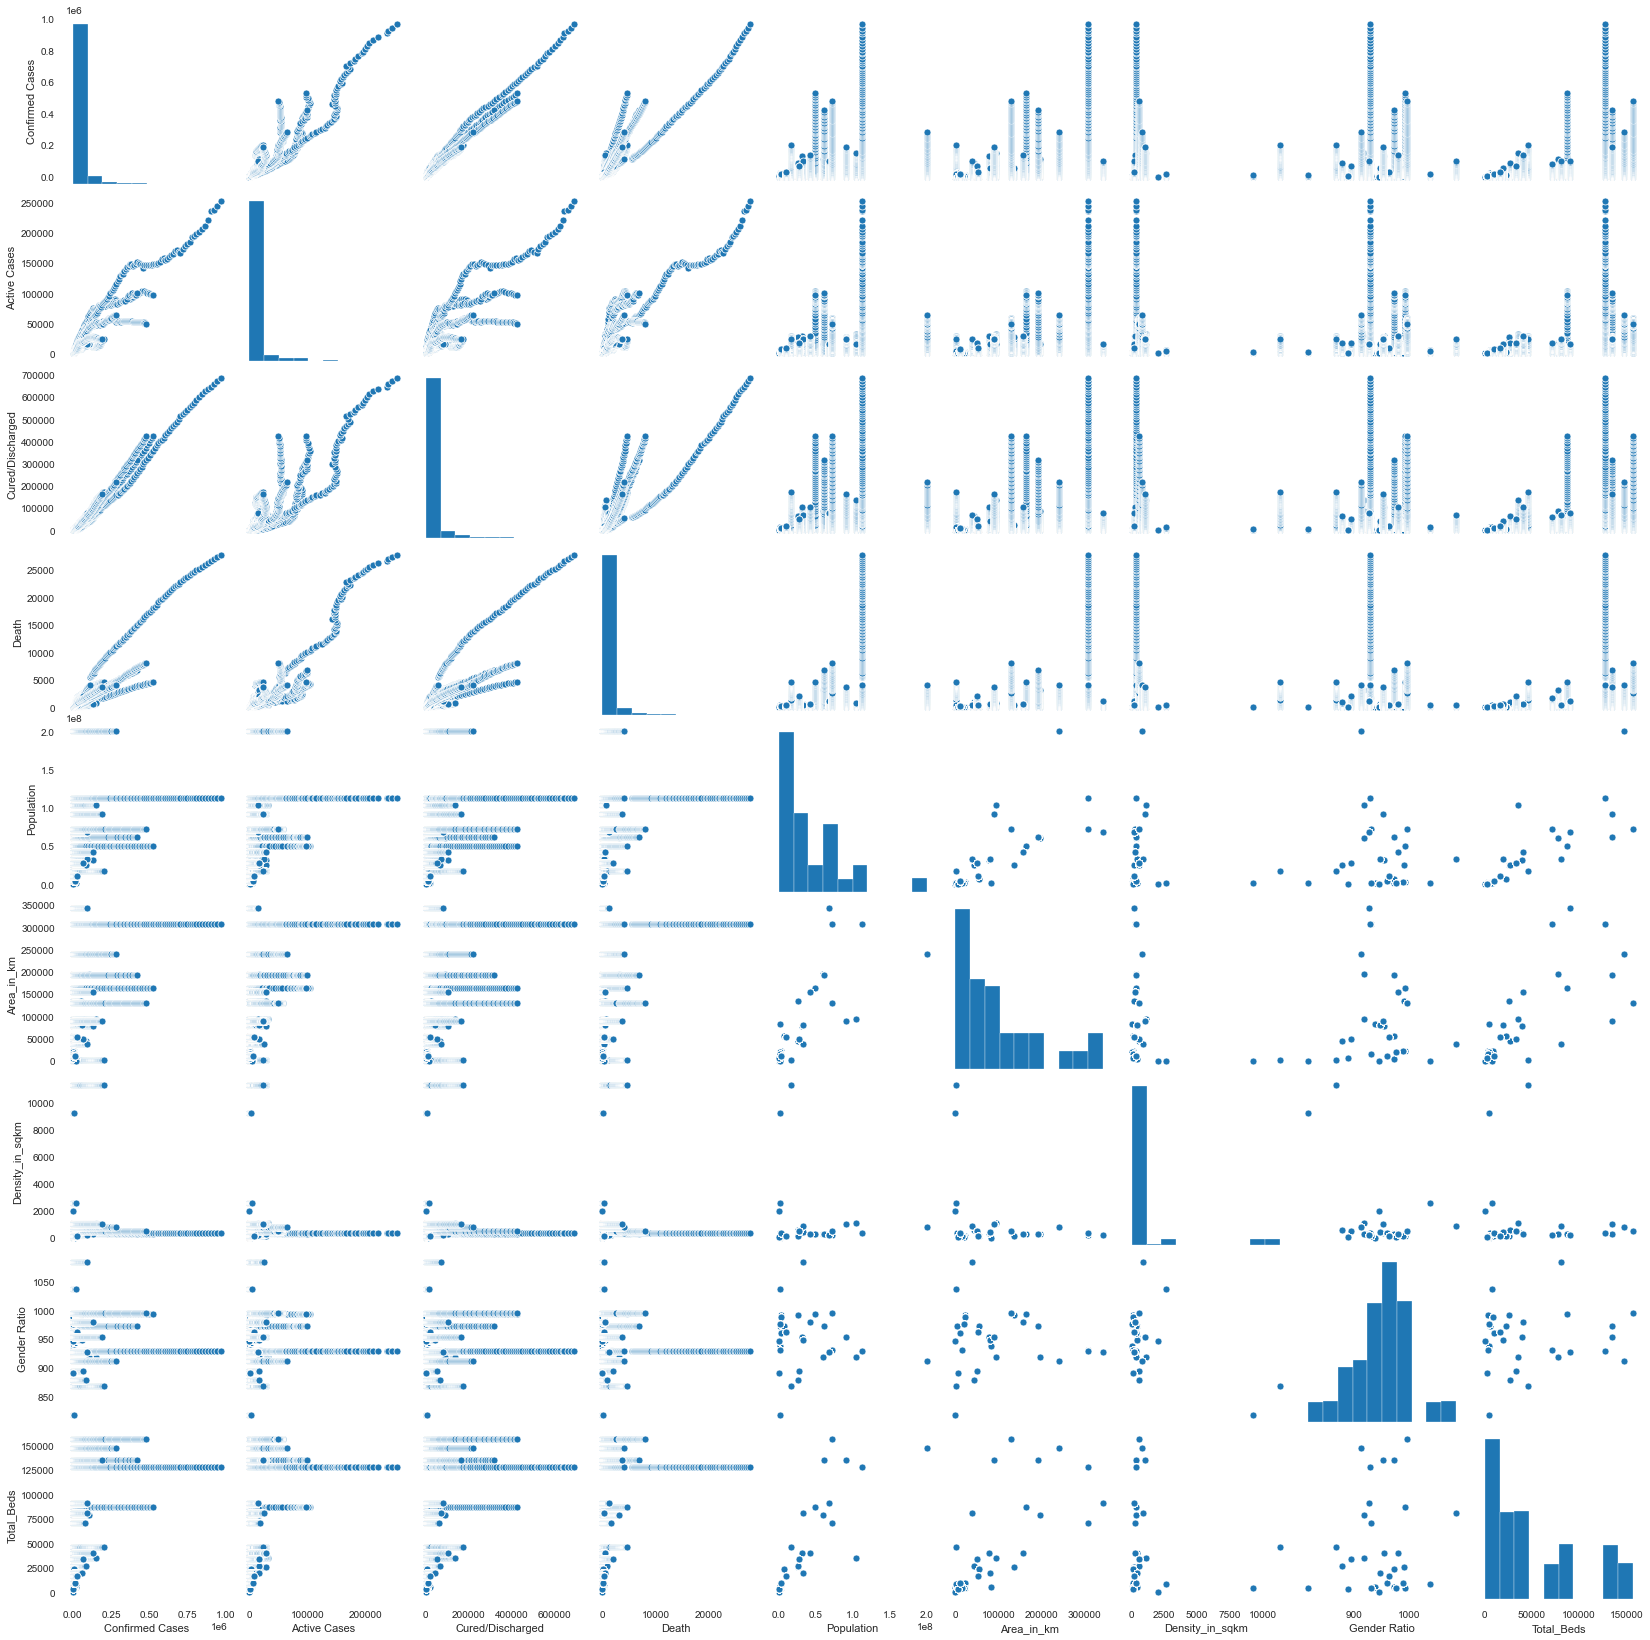

In [60]:
sns.pairplot(dfa)

In [61]:
#After Correlation and Pairplot,its best to use heat map to get integrated data

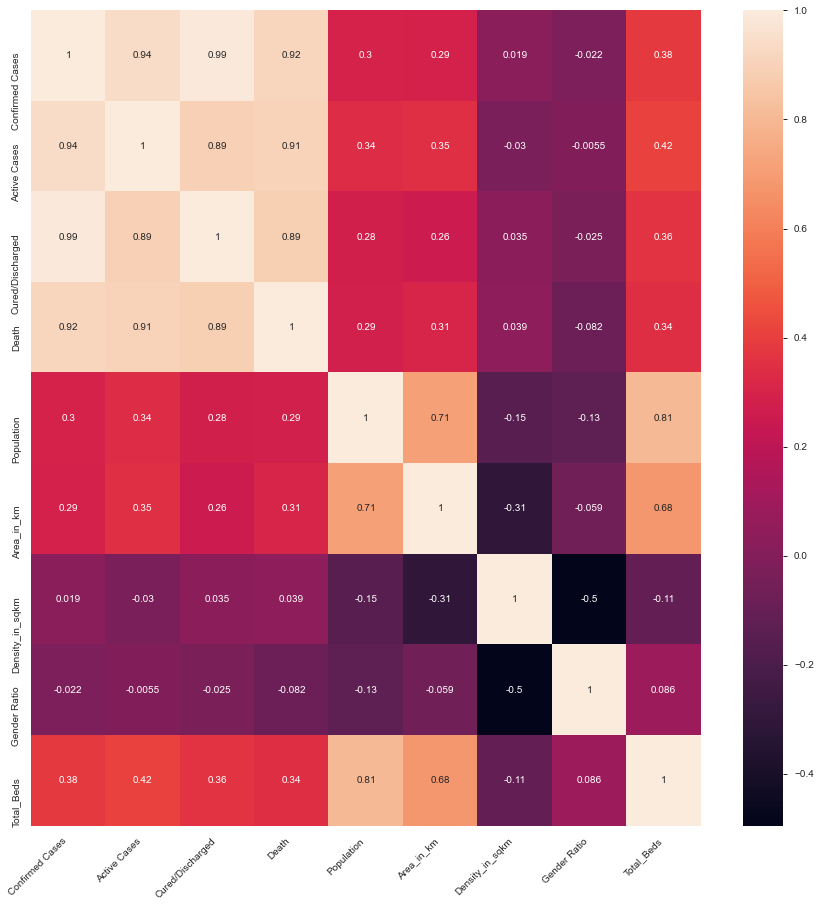

In [62]:
# Make a heatmap of the data 
plt.figure(figsize=(15,15))
hm = sns.heatmap(dfa.corr(), annot=True)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right');

In [63]:
#Now plotting for the columns which are highly correlated

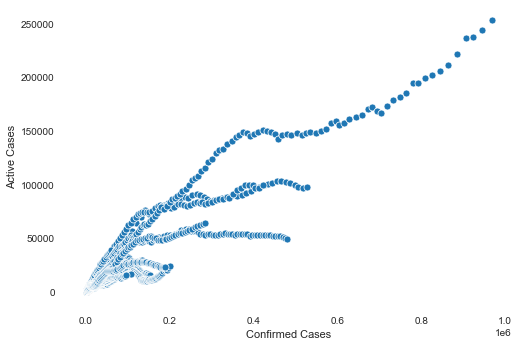

In [64]:
# Plot 
sns.scatterplot(x="Confirmed Cases", y="Active Cases", data=dfa)

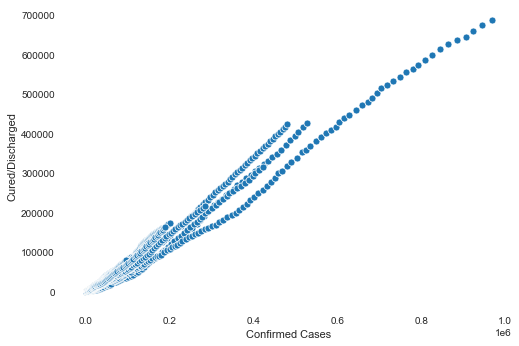

In [65]:
sns.scatterplot(x="Confirmed Cases", y="Cured/Discharged", data=dfa)

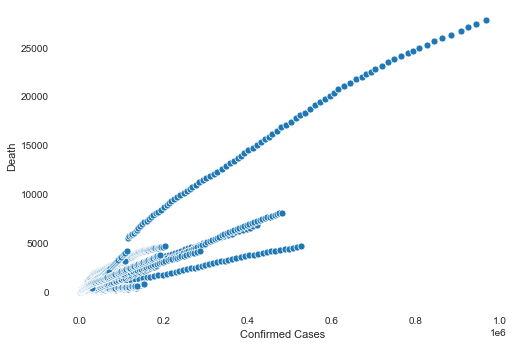

In [66]:
sns.scatterplot(x="Confirmed Cases", y="Death", data=dfa)

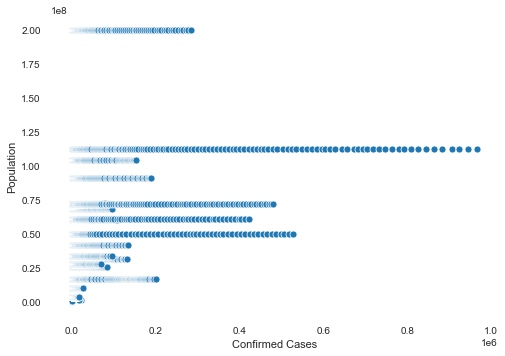

In [68]:
sns.scatterplot(x="Confirmed Cases", y="Population", data=dfa)

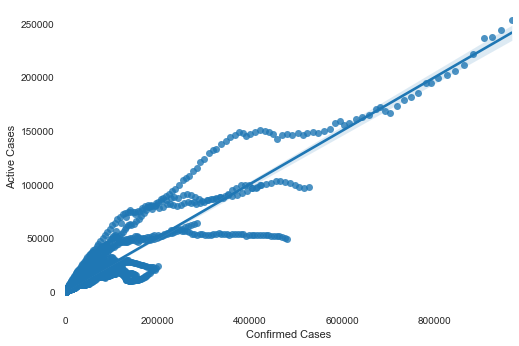

In [69]:
sns.regplot(x="Confirmed Cases", y="Active Cases", data=dfa)

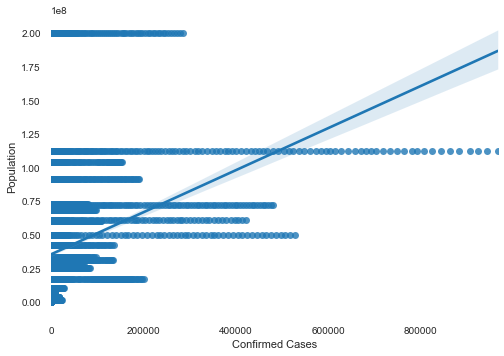

In [70]:
sns.regplot(x="Confirmed Cases", y="Population", data=dfa)

In [ ]:
X_